In [1]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains

import numpy as np

In [2]:
driver=webdriver.Chrome(r"E:\softwares\chromedriver.exe")

### python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [3]:
driver.get("https://amazon.in")
search_Prod=driver.find_element_by_xpath("//*[@id='twotabsearchtextbox']")

In [4]:
userSearch=input("enter the product")

enter the productguitar


In [5]:
search_Prod.send_keys(userSearch)
# clicking the search button
search_btn=driver.find_element_by_xpath("//*[@id='nav-search-submit-button']")
search_btn.click()

In [6]:
driver1=webdriver.Chrome(r"E:\softwares\chromedriver.exe")

In [7]:
def getProductDetails(prod):
    try:
        nameCon=prod.find_element_by_xpath(".//span[contains(@class,'a-text-normal')]")
        name=nameCon.text
        brandName=name.split()[0]
    except:
        brandName='-'       
        name="-"
    try:
        ratingCon=prod.find_element_by_xpath(".//div[@class='a-row a-size-small']/span")
        rating=ratingCon.get_attribute('aria-label')
        
    except:
        rating="-"
    try:
       
        ratingCountCon=prod.find_element_by_xpath(".//span[@class='a-size-base']")
        ratingCount=ratingCountCon.text
    except:
        ratingCount="-"
    try:
        priceCon=prod.find_element_by_xpath(".//span[@class='a-price-whole']")                                            
        price=priceCon.text
    except:
        price="-"
    try:
        delivery=prod.find_element_by_xpath(".//span[contains(@aria-label,'Get it')]")
        delivery=delivery.text
    except:
        delivery='-'       
    try:
        link=prod.find_element_by_xpath(".//a[@class='a-link-normal a-text-normal']")                                            
        link=link.get_attribute('href')
    except:
        link="-"
    try:
        driver1.get(link)
        driver1.implicitly_wait(3)
        availability=driver1.find_element_by_xpath(".//div[@id='availability']/span")                                            
        availability=availability.text
    except:
        availability="-"
    try:
    
        returnEx=driver1.find_element_by_xpath(".//a[@class='a-size-small a-link-normal a-text-normal']")                                          
        returnEx=returnEx.text
    except:
        returnEx="-"
    try:
    
        aboutCon=driver1.find_element_by_xpath(".//div[@id='feature-bullets']")
        x=aboutCon.find_elements_by_xpath(".//span[@class='a-list-item']")
        about=""
        for i in x:
            about=about+i.text
        
    except:
        about="-"

        
                
    
    return(brandName,name,ratingCount,rating,price,returnEx,delivery,availability,link,about)

In [ ]:

brandNameLst=[]
nameLst=[]
ratingLst=[]
ratingcountLst=[]
priceLst=[]
returnExLst=[]
deliveryLst=[]
availabilityLst=[]
prodURLLst=[]
aboutLst=[]
for j in range(0,3):
    products=driver.find_elements_by_xpath("//div[@data-component-type='s-search-result']")
    len(products)
    for product in products:
        brandname,name,ratingCount,rating,price,returnEx,delivery,availability,prodURL,about=getProductDetails(product)
        brandNameLst.append(brandname)
        nameLst.append(name)
        ratingLst.append(rating)
        ratingcountLst.append(ratingCount)
        priceLst.append(price)
        returnExLst.append(returnEx)
        deliveryLst.append(delivery)
        availabilityLst.append(availability)
        prodURLLst.append(prodURL)
        aboutLst.append(about)
        
    try:
        nextURL=driver.find_element_by_xpath("//li[@class='a-last']/a").get_attribute('href')
        driver.get(nextURL)
        driver.implicitly_wait(3)
    except:
        break
        

    

In [ ]:
prodsDf=pd.DataFrame({})
prodsDf['BrandName']=brandNameLst
prodsDf['name']=nameLst
prodsDf['rating']=ratingLst
prodsDf['No of rating']=ratingcountLst
prodsDf['price']=priceLst
prodsDf['return/exchange']=returnExLst
prodsDf['expected delivery']=deliveryLst
prodsDf['Availability']=availabilityLst

prodsDf['other details']=aboutLst

prodsDf['prodURL']=prodURLLst





prodsDf['index']=list(range(1,len(nameLst)+1))
prodsDf.set_index('index',inplace=True)
prodsDf
    

In [ ]:
a

### Access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning

enter the imageNamefruits


In [153]:
import time

In [154]:
def scroll_to_end(wd):
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [164]:
def user_search():
    driver.get("https://images.google.com/")
    userSearch=input("enter the imageName")
    search_Prods=driver.find_element_by_xpath("//input[@title='Search']")
    search_Prods.send_keys(userSearch)
    search_btn=driver.find_element_by_xpath("//button[@type='submit']")
    search_btn.click()
    driver.implicitly_wait(3)
    image_count=0
    max_links_to_fetch=100
    imgContainers=[]
    while image_count < max_links_to_fetch:
            scroll_to_end(driver)
            image_count = len(imgContainers)
            imgContainers=driver.find_elements_by_xpath("//div[@class='isv-r PNCib MSM1fd BUooTd']/a[1]/div[1]/img[1]")
    return imgContainers



In [165]:
fruitsList=user_search()
fruitsImgLst=[]
for image in fruitsList:
    fruitsImgLst.append(image.get_attribute("src"))

enter the imageNamefruits


In [168]:
len(fruitsImgLst)

100

''
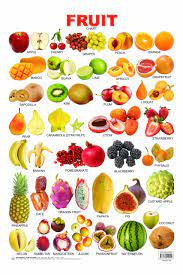

In [170]:
fruitsImgLst[0]

In [173]:
carsList=user_search()
carsImgLst=[]
for image in carsList:
    carsImgLst.append(image.get_attribute("src"))

enter the imageNamecars


In [174]:
len(carsImgLst)

100

In [175]:
machineLrngList=user_search()
machineLrngImgList=[]
for image in machineLrngList:
    machineLrngImgList.append(image.get_attribute("src"))

enter the imageNameMachine Learning


In [176]:
len(machineLrngImgList)


100

''
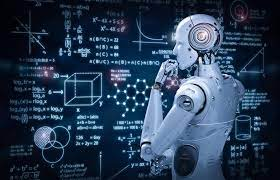

In [177]:
machineLrngImgList[0]

### search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is

In [107]:
driver.get("https://www.flipkart.com/")
try:
    buttonClose=driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
    buttonClose.click()

except:
    pass

In [108]:
userSearch=input("enter the mobileName")

enter the mobileNamepixel 4A


In [109]:
search_Prods=driver.find_element_by_xpath("//input[@title='Search for products, brands and more']")
search_Prods.send_keys(userSearch)
search_btn=driver.find_element_by_xpath("//button[@type='submit']")
search_btn.click()

In [110]:
driver1=webdriver.Chrome(r"E:\softwares\chromedriver.exe")

In [111]:
def getProductFlipkartDetails(prod):
    try:
        name="_"
        brandName="_"
        color="_"
        nameCon=prod.find_element_by_xpath(".//div[@class='_4rR01T']")
        name=nameCon.text
        brandName=name.split()[0]
        color=name.split('(')[1].split(',')[0]
    except:
        name="_"
        brandName="_"
        color="_"
    try:
        price="_"
        price=prod.find_element_by_xpath(".//div[@class='_30jeq3 _1_WHN1']")
        price=price.text
    except:
        price="_"
    try:
        listContainers=prod.find_elements_by_class_name('rgWa7D')
        RAM='_'
        ROM='_'
        Front='_'
        Rear='_'
        battery='_'
        for li in listContainers:
            x=li.text
            if 'RAM' in x:
                ramlist=x.split("|")
                for y in ramlist:
                    if 'RAM' in y:
                        RAM=y.strip()
                    else:
                        ROM=y.strip()
            elif('Camera' in x):
                cameraList=x.split("|")
                for y in cameraList:
                    if 'Front' in y:
                        Front=y.strip()
                    else:
                        Rear=y.strip()
            elif('Battery' in x):
                battery=x            
        
    except:
        RAM='_'
        ROM='_'
        Front='_'
        Rear='_'
        battery='_'
    try:
        prodURL=prod.get_attribute("href")
    except:
        prodURL="_"
    try:
        #display features
        driver1.get(prodURL)
  
        containers=driver1.find_elements_by_xpath(".//div[@class='_3k-BhJ']")
        containers
        try:
            morebutton=driver1.find_element_by_xpath(".//button[@class='_2KpZ6l _1FH0tX']")
            morebutton.click()
        except:
            pass
        displaySize="_"
        Resolution="_"
        processor='_'
        processorCores='_'
        for container in containers:
            containerTxt=container.find_element_by_xpath(".//div[@class='flxcaE']")
            if containerTxt.text=="Display Features":
                rows=container.find_elements_by_xpath(".//tr[@class='_1s_Smc row']")
                for row in rows:
                    x=row.text
                    if 'Display Size' in x:
                        displaySize=x.split("\n")[-1]
                    elif('Resolution' in x):
                        Resolution=x.split("\n")[-1]
            elif containerTxt.text=="Os & Processor Features":
                rows=container.find_elements_by_xpath(".//tr[@class='_1s_Smc row']")
                for row in rows:
                    x=row.text
                    if 'Processor Type' in x:
                        processor=x.split("\n")[-1]
                    elif('Processor Core' in x):
                        processorCores=x.split("\n")[-1]
    except:
        displaySize='_'
        Resolution="_"
        processor="_"
        processorCores="_"
    return(name,brandName,color,RAM,ROM,Front,Rear,prodURL,displaySize,Resolution,processor,processorCores,battery,price)

In [113]:
brandNames=[]
nameLst=[]
colorList=[]
RAMLst=[]
ROMLst=[]
FrontLst=[]
RearLst=[]
ProdURLlst=[]
displaySizeLst=[]
resolutionLst=[]
processorLst=[]
processorCoreLst=[]
batteryLst=[]
priceList=[]

driver.implicitly_wait(3)
prodParentTags=driver.find_elements_by_xpath("*//a[@class='_1fQZEK']")


for prodTag in prodParentTags:
    (name,brandName,color,RAM,ROM,Front,Rear,prodURL,displaySize,Resolution,processor,processorCores,battery,price)=getProductFlipkartDetails(prodTag)
    brandNames.append(brandName)
    nameLst.append(name)
    colorList.append(color)
    RAMLst.append(RAM)
    ROMLst.append(ROM)
    FrontLst.append(Front)
    RearLst.append(Rear)
    ProdURLlst.append(prodURL)
    displaySizeLst.append(displaySize)
    resolutionLst.append(Resolution)
    processorLst.append(processor)
    processorCoreLst.append(processorCores)
    batteryLst.append(battery)    
    priceList.append(price)



In [114]:
prodsDf=pd.DataFrame({})
prodsDf['BrandName']=brandNames
prodsDf['name']=nameLst
prodsDf['color']=colorList
prodsDf['RAM']=RAMLst
prodsDf['ROM']=ROMLst
prodsDf['Front']=FrontLst
prodsDf['Rear']=RearLst
prodsDf['ProdURL']=ProdURLlst


prodsDf['displaySizeLst']=displaySizeLst
prodsDf['resolutionLst']=resolutionLst
prodsDf['processorLst']=processorLst
prodsDf['processorCoreLst']=processorCoreLst
prodsDf['batteryLst']=batteryLst
prodsDf['priceList']=priceList




prodsDf['index']=list(range(1,len(nameLst)+1))
prodsDf.set_index('index',inplace=True)
prodsDf
    

,BrandName,name,color,RAM,ROM,Front,Rear,ProdURL,displaySizeLst,resolutionLst,processorLst,processorCoreLst,batteryLst,priceList
index,,,,,,,,,,,,,,
1,Google,"Google Pixel 4a (Just Black, 128 GB)",Just Black,6 GB RAM,128 GB ROM,8MP Front Camera,12.2MP Rear Camera,https://www.flipkart.com/google-pixel-4a-just-...,14.76 cm (5.81 inch),Full HD+,Qualcomm Snapdragon 730G,Octa Core,3140 mAh Battery,"₹25,999"
2,REDMI,"REDMI 9 Power (Electric Green, 64 GB)",Electric Green,4 GB RAM,64 GB ROM,8MP Front Camera,48MP + 8MP + 2MP + 2MP,https://www.flipkart.com/redmi-9-power-electri...,16.59 cm (6.53 inch),Full HD+,Qualcomm Snapdragon 662,Octa Core,6000 mAh Battery,"₹10,999"
3,REDMI,"REDMI 9 Power (Mighty Black, 64 GB)",Mighty Black,4 GB RAM,64 GB ROM,8MP Front Camera,48MP + 8MP + 2MP + 2MP,https://www.flipkart.com/redmi-9-power-mighty-...,16.59 cm (6.53 inch),Full HD+,Qualcomm Snapdragon 662,Octa Core,6000 mAh Battery,"₹12,990"
4,REDMI,"REDMI 9 Power (Fiery Red, 64 GB)",Fiery Red,4 GB RAM,64 GB ROM,8MP Front Camera,48MP + 8MP + 2MP + 2MP,https://www.flipkart.com/redmi-9-power-fiery-r...,16.59 cm (6.53 inch),Full HD+,Qualcomm Snapdragon 662,Octa Core,6000 mAh Battery,"₹10,999"
5,REDMI,"REDMI 9 Power (Blazing Blue, 64 GB)",Blazing Blue,4 GB RAM,64 GB ROM,8MP Front Camera,48MP + 8MP + 2MP + 2MP,https://www.flipkart.com/redmi-9-power-blazing...,16.59 cm (6.53 inch),Full HD+,Qualcomm Snapdragon 662,Octa Core,6000 mAh Battery,"₹13,995"
6,Redmi,"Redmi 9 (Sky Blue, 64 GB)",Sky Blue,4 GB RAM,64 GB ROM,5MP Front Camera,13MP + 2MP,https://www.flipkart.com/redmi-9-sky-blue-64-g...,16.59 cm (6.53 inch),HD+,MediaTek Helio G35,_,5000 mAh Battery,"₹9,106"
7,Redmi,"Redmi 9 (Sky Blue, 128 GB)",Sky Blue,4 GB RAM,128 GB ROM,5MP Front Camera,13MP + 8MP,https://www.flipkart.com/redmi-9-sky-blue-128-...,16.59 cm (6.53 inch),HD+,MediaTek Helio G35,_,5000 mAh Battery,"₹11,989"
8,REDMI,"REDMI 9 Power (Mighty Black, 128 GB)",Mighty Black,6 GB RAM,128 GB ROM,8MP Front Camera,48MP + 8MP + 2MP + 2MP,https://www.flipkart.com/redmi-9-power-mighty-...,16.59 cm (6.53 inch),Full HD+,Qualcomm Snapdragon 662,Octa Core,6000 mAh Battery,"₹15,933"
9,SAMSUNG,"SAMSUNG Galaxy M02 (Black, 32 GB)",Black,3 GB RAM,32 GB ROM,5MP Front Camera,13MP + 2MP,https://www.flipkart.com/samsung-galaxy-m02-bl...,16.64 cm (6.55 inch),Full HD+,MediaTek MT6739,Quad Core,5000 mAh Battery,"₹8,999"


### scraping geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [116]:
driver.get("https://www.google.com/maps")

In [117]:
userSearch=input("enter location name")

enter location nameMustabad


In [118]:
search_Prods=driver.find_element_by_xpath("//input[@autofocus='autofocus']")
search_Prods.send_keys(userSearch)


In [119]:
search_btn=driver.find_element_by_xpath("//button[@aria-label='Search']")
search_btn.click()

In [121]:
url=driver.find_element_by_css_selector('meta[itemprop=image]').get_attribute('content')

In [123]:
url

'https://maps.google.com/maps/api/staticmap?center=20.98801345%2C82.75252935&zoom=5&size=256x256&language=en&sensor=false&client=google-maps-frontend&signature=ZYHV1n0-tYMoGJDMTZX-6f2GKjM'

In [178]:
[latitude,longitude]=url.split('?center=')[1].split('&zoom=')[0].split('%2C')

In [179]:
latitude

'20.98801345'

In [180]:
longitude

'82.75252935'

### Scrape details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [3]:
driver.get("https://trak.in/india-startup-funding-investment-2015/")
           

In [15]:
dateLst=[]
nameLst=[]
industryLst=[]
subVerticalLst=[]
cityLst=[]
investorsLst=[]
investmentTypeLst=[]
amoutLst=[]
for i in range(48,51):
    rows = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr'.format(i))
    for row in rows:
        cols = row.find_elements_by_xpath('.//td')        
        dateLst.append(cols[1].text)
        nameLst.append(cols[2].text)
        industryLst.append(cols[3].text)
        subVerticalLst.append(cols[4].text)
        cityLst.append(cols[5].text)
        investorsLst.append(cols[6].text)
        investmentTypeLst.append(cols[7].text)
        amoutLst.append(cols[8].text)


In [18]:
        
funding=pd.DataFrame({})
funding['Date']=dateLst
funding['name']=nameLst
funding['industry/vertical']=industryLst
funding['subvertical']=subVerticalLst
funding['city']=cityLst
funding['investors']=investorsLst
funding['investmentType']=investmentTypeLst
funding['amountLst']=amoutLst






funding['index']=list(range(1,len(nameLst)+1))
funding.set_index('index',inplace=True)
funding

,Date,name,industry/vertical,subvertical,city,investors,investmentType,amountLst
index,,,,,,,,
1,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
2,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
3,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
4,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
5,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
6,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
7,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
8,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
9,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"


## Write a program to scrap all the available details of best gaming laptops from digit.in.


In [ ]:
Gaming

In [ ]:
class="menu"

In [37]:
driver.get("https://www.digit.in/")
a = ActionChains(driver)
m= driver.find_element_by_xpath("*//div[@class='menu']/ul[1]/li[3]")
a.move_to_element(m).perform()
m.click()

listItems= driver.find_elements_by_xpath("*//ul[@class='list-unstyled sidebar-list']/li")
for item in listItems:
    if item.text =="Best Gaming Laptops in India":
        item.click()
        break


In [41]:
tableRows = driver.find_elements_by_xpath("*//table[@id='summtable']/tbody/tr")

In [44]:
productName=[]
seller=[]
price=[]
for tableRow in tableRows:
    tds = tableRow.find_elements_by_xpath(".//td")
    if len(tds)>0:
        productName.append(tds[0].text)
        seller.append(tds[1].text)
        price.append(tds[2].text)    

In [45]:
        
laptops=pd.DataFrame({})
laptops['product Name']=productName
laptops['seller']=seller
laptops['price']=price

laptops['index']=list(range(1,len(productName)+1))
laptops.set_index('index',inplace=True)
laptops

,product Name,seller,price
index,,,
1,Acer NITRO 5 Ryzen 9 (2021),Flipkart,"₹ 129,990"
2,MSI Stealth 15M 11th Gen Core i7-11375H (2021,Flipkart,"₹ 134,990"
3,ASUS ROG Strix Scar 15 Ryzen 9-5900HX (2021),Flipkart,"₹ 268,990"
4,Alienware Area 51M R2,N/A,"₹ 342,989"
5,Alienware m15 R3,Amazon,"₹ 319,990"
6,ASUS ROG Strix Scar 15,Flipkart,"₹ 215,990"
7,Asus ROG Zephyrus G14,Amazon,"₹ 164,990"
8,Lenovo Legion 5i,Amazon,"₹ 76,988"
9,ASUS ROG ZEPHYRUS DUO 15,Amazon,"₹ 185,000"


### scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [188]:
driver.get("https://www.forbes.com/")

In [192]:
search_btn=driver.find_element_by_xpath("//button[@aria-label='Open Navigation Menu']")
search_btn.click()

In [198]:
a = ActionChains(driver)
m= driver.find_element_by_xpath("//li[@data-title='Billionaires']")
#hover the mouse
a.move_to_element(m).perform()

worldsBillionaires=driver.find_element_by_xpath('.//a[@aria-label="World\'s Billionaires"]')
worldsBillionaires.click()

In [223]:
len(listRows)

15

In [229]:
def getBilllionareDetails(liRow):
    try:
        rank="_"
        rank=liRow.find_element_by_xpath(".//div[@class='rank']")
        rank=rank.text
        
    except:
        rank="_"
    try:
        person="_"
        person=liRow.find_element_by_xpath(".//div[@class='personName']")
        person=person.text
        
    except:
        person="_"
    try:
        netWorth="_"
        netWorth=liRow.find_element_by_xpath(".//div[@class='netWorth']")
        netWorth=netWorth.text
        
    except:
        netWorth='_'
        
    try:
        age="_"
        age=liRow.find_element_by_xpath(".//div[@class='age']")
        age=age.text
    except:
        age="_"
    try:
        citizenShip="_"
        citizenShip=liRow.find_element_by_xpath(".//div[@class='countryOfCitizenship']")
        citizenShip=citizenShip.text
    except:
        citizenShip="_"
    try:
        source="_"
        source=liRow.find_element_by_xpath(".//div[@class='source-column']")
        source=source.text
       
    except:
        source='_'
    try:
        category="_"
        category=liRow.find_element_by_xpath(".//div[@class='category']")
        category=category.text
       
    except:
        category='_'
    
        
    return(rank,person,netWorth,age,citizenShip,source,category)

In [232]:
rankLst=[]
nameLst=[]
netWorthLst=[]
ageLst=[]
citizenLst=[]
sourceLst=[]
categoryLst=[]


tableRowGrps=driver.find_elements_by_xpath("*//div[@class='table-row-group']")
tableRowGrp=tableRowGrps[1]
for tableRowGrp in tableRowGrps:
    listRows=tableRowGrp.find_elements_by_xpath(".//div[@role='row']")
    for liRow in listRows:
        (rank,person,netWorth,age,citizenShip,source,category)=getBilllionareDetails(liRow)
        rankLst.append(rank)
        nameLst.append(person)
        netWorthLst.append(netWorth)
        ageLst.append(age)
        citizenLst.append(citizenShip)
        sourceLst.append(source)
        categoryLst.append(category)
        
        
billionaries=pd.DataFrame({})
billionaries['rank']=rankLst
billionaries['name']=nameLst
billionaries['netWorth']=netWorthLst
billionaries['age']=ageLst
billionaries['citizenship']=citizenLst
billionaries['source']=sourceLst
billionaries['industry']=categoryLst





billionaries['index']=list(range(1,len(nameLst)+1))
billionaries.set_index('index',inplace=True)
billionaries
    
        

,rank,name,netWorth,age,citizenship,source,industry
index,,,,,,,
1,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
2,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
3,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
4,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
5,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
196,195.,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
197,197.,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
198,197.,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified


### scrape extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [95]:
def scroll_to_end(wd):
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [81]:
totalcomments = driver.find_elements_by_xpath('//*[@id="content-text"]')
totalcomments[0].text
len(totalcomments)

20

In [ ]:
div id="main"
class="style-scope ytd-comment-renderer"
//*[@id="main"]

In [80]:
commentContainer = driver.find_elements_by_xpath('//*[@id="main"]')
len(commentContainer)

21

In [68]:
class="style-scope ytd-comment-renderer"
ytd-expander

0

In [109]:
import time

In [138]:
youtube = "https://www.youtube.com/"
driver.get(youtube)
driver.implicitly_wait(3)


    
userSearch=input("enter the songName eg: Param Sundari")

search_Prod=driver.find_element_by_xpath("//div[@id='search-input']/input")
search_Prod.send_keys(userSearch)
driver.find_element_by_id('search-icon-legacy').click()

a = ActionChains(driver)
m= driver.find_element_by_xpath("//a[@id='video-title']")
#hover the mouse
a.move_to_element(m).perform()
m.click()

driver.implicitly_wait(3)

scroll_to_end(driver)

commentLen=0
max_comments_to_fetch=500
driver.execute_script('window.scrollTo(0,100);')
driver.implicitly_wait(10)

x=300
z=x
k=0
while commentLen < max_comments_to_fetch:
    #scroll_to_end(driver)
    x=x+z
    #driver.execute_script("window.scrollTo(0,Math.max(document.documentElement.scrollHeight,document.body.scrollHeight,document.documentElement.clientHeight))")
    y='window.scrollTo(0,{})'.format(x)
    driver.execute_script(y)
    
    time.sleep(2)
    #driver.implicitly_wait(3)

    totalcomments= driver.find_elements_by_xpath("//*[@id='content-text']")
    commentLen = len(totalcomments)
    k=k+1
    if k==10:
        k=0
        print('number of comments:',commentLen)
    

enter the songName eg: Param SundariParam Sundari
number of comments: 40
number of comments: 60
number of comments: 80
number of comments: 120
number of comments: 140
number of comments: 160
number of comments: 180
number of comments: 220
number of comments: 240
number of comments: 280
number of comments: 300
number of comments: 320
number of comments: 360
number of comments: 380
number of comments: 420
number of comments: 440
number of comments: 480


In [142]:
print('number of comments:',commentLen)


number of comments: 500


In [139]:
totalcomments= driver.find_elements_by_xpath("//*[@id='content-text']")

500

In [143]:
def getCommentDetaails(commentContainer):
    try:
        comment="_"
        comment=commentContainer.find_element_by_xpath(".//*[@id='content-text']").text        
    except:
        comment="_"
        
    try:
        dt="_"
        dt=commentContainer.find_element_by_xpath(".//yt-formatted-string[@class='published-time-text above-comment style-scope ytd-comment-renderer']").text
    except:
        dt="_"
    try:
        upvoteCount="_"
        upvoteCount=commentContainer.find_element_by_xpath(".//span[@id='vote-count-middle']").text
    except:
        upvoteCount="_"
    
    return (comment,dt,upvoteCount)

In [145]:
commmetLst=[]
upvotesLst=[]
timeLst=[]


commentContainers = driver.find_elements_by_xpath('//*[@id="main"]')


for commentContainer in commentContainers:
    comment,dt,upvoteCount=getCommentDetaails(commentContainer)
    commmetLst.append(comment)
    upvotesLst.append(upvoteCount)
    timeLst.append(dt)
    
        
        
commetsDF=pd.DataFrame({})
commetsDF['Comment']=commmetLst
commetsDF['upvotes']=upvotesLst
commetsDF['time']=timeLst





In [146]:


commetsDF['index']=list(range(1,len(commetsDF)+1))
commetsDF.set_index('index',inplace=True)
commetsDF

,Comment,upvotes,time
index,,,
1,This song is really like I'm addicted to it be...,38,2 days ago
2,“Learn to light a candle in the darkest moment...,45,1 day ago
3,"It's October 2021,let's see how many legends ...",62,4 days ago
4,Hats off \nWhat a way of thinking AR REHMAN is...,6,3 days ago
5,Totally Addicted to this Song,7,5 days ago
...,...,...,...
496,A R R A H M A N. . .,53,1 week ago
497,,,6 days ago
498,Ak no song,1,1 week ago


In [150]:
commetsDF.iloc[493]

Comment    പരമ സുന്ദരി എന്ന് കേട്ടപ്പോൾ മലയാളം പാട്ട് ആണ്...
upvotes                                                     
time                                              6 days ago
Name: 494, dtype: object

### Scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. 
### hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [163]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains

import numpy as np

In [164]:
driver=webdriver.Chrome(r"E:\softwares\chromedriver.exe")

In [168]:
hstls = "https://www.hostelworld.com/"
driver.get(hstls)
driver.implicitly_wait(3)


a = ActionChains(driver)
m= driver.find_element_by_xpath("//*[@id='location-text-input-field']")
#hover the mouse
a.move_to_element(m).perform()
m.click()

 

In [169]:
   
userSearch=input("enter the location eg: London")
search_Prod=driver.find_element_by_xpath("//*[@id='search-input-field']")
#search_Prod=driver.find_element_by_xpath("//*[@id='location-text-input-field']")
search_Prod.send_keys(userSearch)
#driver.find_element_by_id('search-icon-legacy').click()

enter the location eg: LondonLondon


In [170]:
predicted=driver.find_element_by_xpath("//*[@id='predicted-search-results']/li[2]")
predicted.click()

In [171]:
letsGoButton=driver.find_element_by_xpath("//*[@class='search-button']/button")
letsGoButton.click()

In [187]:
propertyCards=driver.find_elements_by_xpath("//*[@class='property-card']")
len(propertyCards)


32

In [195]:
propertyCard =propertyCards[3]

"St Christopher's Village\nHostel - 1.8km from city centre Show on Map\nFree WiFi\nFollows Covid-19 sanitation guidance"

'Hostel - 1.8km from city centre Show on Map'

In [244]:
def propertyDetails(propertyCard):
    try:
        propertyCon=propertyCard.find_element_by_xpath(".//*[@class='property']")
    except:
        propertyCon='0'
        
    try:
        titleRow=propertyCon.find_element_by_xpath(".//*[@class='title-row']")
    except:
        titleRow="_"
    try:
        title=titleRow.find_element_by_xpath(".//*[@class='title title-6']")
        title=title.text
    except:
        title="_"
        
    try:
        distance=titleRow.find_element_by_xpath(".//*[@class='subtitle body-3']")
        distance=distance.text
    except:
        distance="_"
        
    try:
        facilities=propertyCon.find_element_by_xpath(".//*[@class='facilities-label facilities']")
        facilities=facilities.text.replace("\n",",")

    except:
        facilities="_"

    try:
        infoCon=propertyCon.find_element_by_xpath(".//*[@class='info']")
        
        try:
            overallReview=infoCon.find_element_by_xpath(".//*[@class='keyword']")
            overallReview=overallReview.text.replace("\n",',')
        except:
            overallReview="_"
        try:
            totalReviews=infoCon.find_element_by_xpath(".//*[@class='reviews']")
            totalReviews=totalReviews.text.split()[0]
        except:
            totalReviews="_"
        try:

            propertyDesc=infoCon.find_element_by_xpath(".//*[@class='rating-factors prop-card-tablet rating-factors small']")
            propertyDesc=propertyDesc.text.replace("\n",',')
        except:
            propertyDesc="_"
        try:
            rating=infoCon.find_element_by_xpath(".//div[contains(@aria-label,'Rating')]")
            rating=rating.text
        except:
            rating="_"
    except:
        overallReview='_'
        totalReviews="_"
        propertyDesc="_"
        rating="_"
        
    try:
        pricesCon=propertyCard.find_element_by_xpath(".//*[@class='prices']")
        prices=pricesCon.find_elements_by_xpath(".//*[@class='price-col']")
        privates=prices[0]
        dorms=prices[1]

        if 'No' in privates.text:
            privatesFrom=0
        else:
            privatesFrom=privates.text.split()[-1]

        if 'No' in dorms.text:
            dormsFrom=0
        else:
            dormsFrom=dorms.text.split()[-1]
    except:
        dormsFrom=0
        privatesFrom=0
        
    
    return (title,distance,facilities,overallReview,totalReviews,propertyDesc,rating, dormsFrom,privatesFrom)

In [245]:
commmetLst=[]
upvotesLst=[]
timeLst=[]
titleLst=[]
distanceLst=[]
facilitiesLst=[]
overallReviewLst=[]
totalReviewsLst=[]
propertyDescLst=[]
ratingLst=[]
dormsFromLst=[]
privatesFromLst=[]




for propertyCard in propertyCards:

    (title,distance,facilities,overallReview,totalReviews,propertyDesc,rating, dormsFrom,privatesFrom)=propertyDetails(propertyCard)
    titleLst.append(title)
    distanceLst.append(distance)
    facilitiesLst.append(facilities)
    overallReviewLst.append(overallReview)
    totalReviewsLst.append(totalReviews)
    propertyDescLst.append(propertyDesc)
    ratingLst.append(rating)
    dormsFromLst.append(dormsFrom)
    privatesFromLst.append(privatesFrom)
    
        
        
hostelsDF=pd.DataFrame({})
hostelsDF['hostel Name']=titleLst
hostelsDF['distance from city']=distanceLst

hostelsDF['ratings']=ratingLst
hostelsDF['total reviews']=totalReviewsLst
hostelsDF['overall reviews']=overallReviewLst

hostelsDF['privates from price']=privatesFromLst

hostelsDF['Dorms From Price']=dormsFromLst

hostelsDF['Facilities']=facilitiesLst

hostelsDF['property Description']=propertyDescLst


In [246]:


hostelsDF['index']=list(range(1,len(titleLst)+1))
hostelsDF.set_index('index',inplace=True)
hostelsDF

,hostel Name,distance from city,ratings,total reviews,overall reviews,privates from price,Dorms From Price,Facilities,property Description
index,,,,,,,,,
1,_,Hostel - 5.5km from city centre,9.0,_,Superb,0,0,_,_
2,_,Hostel - 11.9km from city centre,8.5,_,Fabulous,0,0,_,_
3,247london Hostel and Private Rooms,Hostel - 8.2km from city centre Show on Map,6.6,443,Good,Rs5285,0,Free WiFi,"Nice Location,Helpful Staff,Excellent Cleanliness"
4,St Christopher's Village,Hostel - 1.8km from city centre Show on Map,8.4,10880,Fabulous,0,Rs1924,"Free WiFi,Follows Covid-19 sanitation guidance","Perfect Location,Superb Staff,Excellent Cleanl..."
5,Smart Camden Inn Hostel,Hostel - 4.4km from city centre Show on Map,8.9,2697,Fabulous,0,Rs1799,"Free WiFi,Follows Covid-19 sanitation guidance","Perfect Location,Superb Staff,Fantastic Cleanl..."
6,The Finnish Church in London,Hostel - 4.5km from city centre Show on Map,9.5,194,Superb,0,Rs2705,"Free WiFi,Follows Covid-19 sanitation guidance","Perfect Location,Superb Staff,Fantastic Cleanl..."
7,No.8 Seven Sisters,Hostel - 9km from city centre Show on Map,6.6,3640,Good,0,Rs945,"Free WiFi,Follows Covid-19 sanitation guidance","Great Location,Marvellous Staff"
8,The London Home Hostel,Hostel - 8.2km from city centre Show on Map,5.6\nRating\n250 Total Reviews,250,Rating,Rs4145,Rs1637,Free WiFi,"Nice Location,Brilliant Staff"
9,Selina Camden,Hostel - 5.5km from city centre Show on Map,9.0,10,Superb,Rs27386,0,Free WiFi,"Perfect Location,Superb Staff,Fantastic Cleanl..."
